In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [3]:
df=pd.read_csv("Final_Fully_Filled_Dataset.csv",encoding='unicode_escape')

In [4]:
df

,Girl_age,Relationship_Status,Past_RelationShips,Body_Count,Easy_Moveon,Looks,Response,Introvert/Extrovert,Superiority_Complex,Mistake_Acceptance,Open_to_Phone,Pays_Bill,High_Maintenance,Male_Bestfriends,Time_with_male_friends(In min),Feminist,GenZ_prespective,Red_Flag?
0,12,Yes,0,0,Mid,0,Normal,I,Yes,No,Yes,No,No,0,0,Yes,No,White
1,12,Yes,1,0,Mid,4,Normal,E,No,No,No,No,No,0,0,No,No,White
2,12,Yes,0,0,Mid,9,Normal,I,No,No,Yes,No,No,0,0,Yes,No,Green
3,12,No,1,0,Mid,2,Interested,E,No,No,No,No,Yes,0,0,No,Yes,Red
4,12,Yes,0,0,Mid,3,Normal,I,No,Yes,No,No,No,0,0,Yes,No,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,30,No,2,0,Low,10,Normal,E,No,Yes,No,No,No,4,80,Yes,No,Green
586,30,Yes,0,1,Mid,10,Not interested,E,No,No,No,Yes,No,1,20,Yes,Yes,White
587,30,No,2,4,Mid,10,Not interested,E,No,No,Yes,Yes,Yes,1,20,Yes,No,White
588,29,Yes,23,12,Mid,8,Not interested,I,No,No,Yes,No,No,2,40,Yes,No,Red


In [5]:
df.isnull().sum()

Girl_age                          0
Relationship_Status               0
Past_RelationShips                0
Body_Count                        0
Easy_Moveon                       0
Looks                             0
Response                          0
Introvert/Extrovert               0
Superiority_Complex               0
Mistake_Acceptance                0
Open_to_Phone                     0
Pays_Bill                         0
High_Maintenance                  0
Male_Bestfriends                  0
Time_with_male_friends(In min)    0
Feminist                          0
GenZ_prespective                  0
Red_Flag?                         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Girl_age                        590 non-null    int64 
 1   Relationship_Status             590 non-null    object
 2   Past_RelationShips              590 non-null    int64 
 3   Body_Count                      590 non-null    int64 
 4   Easy_Moveon                     590 non-null    object
 5   Looks                           590 non-null    int64 
 6   Response                        590 non-null    object
 7   Introvert/Extrovert             590 non-null    object
 8   Superiority_Complex             590 non-null    object
 9   Mistake_Acceptance              590 non-null    object
 10  Open_to_Phone                   590 non-null    object
 11  Pays_Bill                       590 non-null    object
 12  High_Maintenance                590 non-null    ob

In [8]:
import pandas as pd

def value_counts_for_all_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"Value counts for '{column}':")
        print(df[column].value_counts(), "\n")


value_counts_for_all_columns(df)


Value counts for 'Relationship_Status':
Relationship_Status
Yes    295
No     295
Name: count, dtype: int64 

Value counts for 'Easy_Moveon':
Easy_Moveon
Mid     405
Low      97
High     88
Name: count, dtype: int64 

Value counts for 'Response':
Response
Normal             371
Not interested     134
Interested          71
Not Interested      14
Name: count, dtype: int64 

Value counts for 'Introvert/Extrovert':
Introvert/Extrovert
E    297
I    293
Name: count, dtype: int64 

Value counts for 'Superiority_Complex':
Superiority_Complex
No     330
No     140
Yes    120
Name: count, dtype: int64 

Value counts for 'Mistake_Acceptance':
Mistake_Acceptance
No     460
Yes    130
Name: count, dtype: int64 

Value counts for 'Open_to_Phone':
Open_to_Phone
Yes    359
No     231
Name: count, dtype: int64 

Value counts for 'Pays_Bill':
Pays_Bill
No     470
Yes    120
Name: count, dtype: int64 

Value counts for 'High_Maintenance':
High_Maintenance
No     443
Yes    147
Name: count, dtype: int64

In [9]:
df['Red_Flag?'] = df['Red_Flag?'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Red_Flag?'] = df['Red_Flag?'].replace({'White':'White'}) 

In [10]:
df['Feminist'] = df['Feminist'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Feminist'] = df['Feminist'].replace({'Yes':'YEs'}) 

In [11]:
df['Response'] = df['Response'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Response'] = df['Response'].replace({'Not Interested':'Not interested'}) 

In [12]:
df['Superiority_Complex'] = df['Superiority_Complex'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Superiority_Complex'] = df['Superiority_Complex'].replace({'No':'No'}) 

In [13]:
import pandas as pd

def value_counts_for_all_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"Value counts for '{column}':")
        print(df[column].value_counts(), "\n")


value_counts_for_all_columns(df)


Value counts for 'Relationship_Status':
Relationship_Status
Yes    295
No     295
Name: count, dtype: int64 

Value counts for 'Easy_Moveon':
Easy_Moveon
Mid     405
Low      97
High     88
Name: count, dtype: int64 

Value counts for 'Response':
Response
normal            371
not interested    148
interested         71
Name: count, dtype: int64 

Value counts for 'Introvert/Extrovert':
Introvert/Extrovert
E    297
I    293
Name: count, dtype: int64 

Value counts for 'Superiority_Complex':
Superiority_Complex
no     470
yes    120
Name: count, dtype: int64 

Value counts for 'Mistake_Acceptance':
Mistake_Acceptance
No     460
Yes    130
Name: count, dtype: int64 

Value counts for 'Open_to_Phone':
Open_to_Phone
Yes    359
No     231
Name: count, dtype: int64 

Value counts for 'Pays_Bill':
Pays_Bill
No     470
Yes    120
Name: count, dtype: int64 

Value counts for 'High_Maintenance':
High_Maintenance
No     443
Yes    147
Name: count, dtype: int64 

Value counts for 'Feminist':
Femin

<Axes: xlabel='Girl_age', ylabel='Body_Count'>

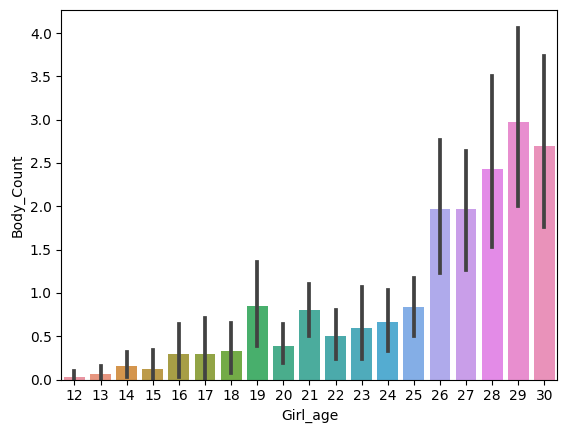

In [14]:
sns.barplot(x="Girl_age",y="Body_Count",data=df)

<Axes: xlabel='Red_Flag?', ylabel='Time_with_male_friends(In min)'>

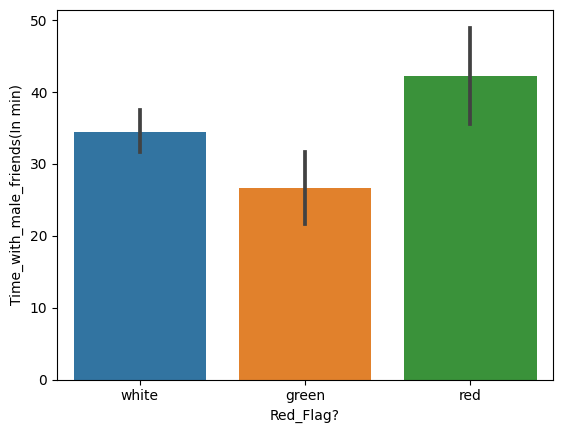

In [15]:
sns.barplot(x="Red_Flag?",y="Time_with_male_friends(In min)",data=df)

In [16]:
df_counts = df.groupby(['Girl_age', 'Red_Flag?']).size().reset_index(name='count')

<Axes: xlabel='Girl_age', ylabel='count'>

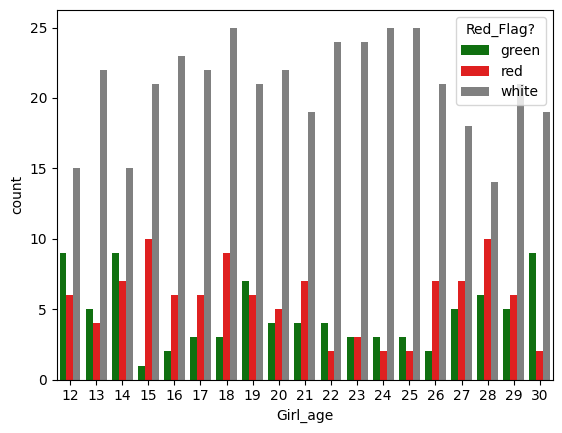

In [17]:
custom_colors = {"white": "grey", "red": "red", "green": "green"}
sns.barplot(x="Girl_age",y="count",data=df_counts,hue='Red_Flag?',palette=custom_colors)

In [18]:

x=df.drop(['Red_Flag?'],axis=1)
y=df['Red_Flag?']

In [19]:
x.head()

,Girl_age,Relationship_Status,Past_RelationShips,Body_Count,Easy_Moveon,Looks,Response,Introvert/Extrovert,Superiority_Complex,Mistake_Acceptance,Open_to_Phone,Pays_Bill,High_Maintenance,Male_Bestfriends,Time_with_male_friends(In min),Feminist,GenZ_prespective
0,12,Yes,0,0,Mid,0,normal,I,yes,No,Yes,No,No,0,0,yes,No
1,12,Yes,1,0,Mid,4,normal,E,no,No,No,No,No,0,0,no,No
2,12,Yes,0,0,Mid,9,normal,I,no,No,Yes,No,No,0,0,yes,No
3,12,No,1,0,Mid,2,interested,E,no,No,No,No,Yes,0,0,no,Yes
4,12,Yes,0,0,Mid,3,normal,I,no,Yes,No,No,No,0,0,yes,No


In [20]:
y.head()

0    white
1    white
2    green
3      red
4    green
Name: Red_Flag?, dtype: object

In [21]:
num_features=x.select_dtypes(exclude="object").columns
non_num_features=x.select_dtypes(include="object").columns
non_num_features

Index(['Relationship_Status', 'Easy_Moveon', 'Response', 'Introvert/Extrovert',
       'Superiority_Complex', 'Mistake_Acceptance', 'Open_to_Phone',
       'Pays_Bill', 'High_Maintenance', 'Feminist', 'GenZ_prespective'],
      dtype='object')

In [22]:
Standard=StandardScaler()
onehot=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer([("OneHotEncoder",onehot,non_num_features),
                                ("StandardScaler",Standard,num_features)])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42, stratify=y)
x_train.shape, x_test.shape

((395, 17), (195, 17))

In [24]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

In [26]:
y_train = np.argmax(y_train, axis=1)  # Convert one-hot to label indices
y_test = np.argmax(y_test, axis=1)

In [27]:
print(type(y_train))
print(type(y_test))
print(y_train.shape)
print( y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(395,)
(195,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  


In [29]:
models = {
        "Linear Regression": LinearRegression(),
        "Lasso":Lasso(),
        "ridge":Ridge(),
        "elasticnet":ElasticNet(),
        
        "logistic":LogisticRegression(),
        "svc":SVC(),
        "nb":GaussianNB(),
        "knn":KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost classifier": AdaBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBClassifier": XGBClassifier(),
        }
           
params={
        "Linear Regression":{},

        "Lasso":{},

        "ridge":{},

        "elasticnet":{},
        
        
        "logistic":{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[100,10,1.0,0.1,0.01],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },

        "svc":{
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
        },

        "nb":{},

        "knn":{},

        "Decision Tree": {
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson','gini','entropy', 'log_loss'],
            # 'splitter':['best','random'],
            'max_depth':[1,2,3,4,5],
            # 'max_features':['auto','sqrt','log2'],
        },

        "Random Forest":{
            # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "max_depth": [5, 8, 15, None, 10],    
            # 'max_features':['sqrt','log2',None],
            "min_samples_split": [2, 8, 15, 20],
            'n_estimators': [8,16,32,64,128,256]
        },

        "AdaBoost classifier":{
            'learning_rate':[.1,.01,0.5,.001],
          # 'loss':['linear','square','exponential'],
            'n_estimators': [8,16,32,64,128,256],
            "algorithm":['SAMME','SAMME.R']
        },

        "Gradient Boosting":{
            # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
            # 'criterion':['squared_error', 'friedman_mse'],
            # 'max_features':['auto','sqrt','log2'],
            'n_estimators': [8,16,32,64,128,256]
        },
        
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256],
            #"max_depth": [5, 8, 12, 20, 30],
            #"colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
        }
}

In [30]:
def evaluate_models(x_train, y_train,x_test,y_test,models):#,param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        
        '''para=param[list(models.keys())[i]]
        gs = GridSearchCV(model,para,cv=3)
        gs.fit(x_train,y_train)
        model.set_params(**gs.best_params_)'''     
        model.fit(x_train,y_train)
        y_train_pred = np.round(model.predict(x_train)).astype(int)
        y_test_pred = np.round(model.predict(x_test)).astype(int)
        
        #y_train_pred = model.predict(x_train)

        #y_test_pred = model.predict(x_test)
        
        train_model_score = accuracy_score(y_train, y_train_pred)*100

        test_model_score = accuracy_score(y_test, y_test_pred)*100

        report[list(models.keys())[i]] = test_model_score
    return report 


In [31]:
from sklearn.metrics import accuracy_score
model_report:dict=evaluate_models(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,
                                             models=models)#,param=params)
            
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict
best_model_name = list(model_report.keys())[
        list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

predicted=best_model.predict(x_test)


In [32]:
print(best_model)
print()
for i in model_report:
    print(i,model_report[i])

LogisticRegression()

Linear Regression 52.820512820512825
Lasso 67.17948717948717
ridge 54.871794871794876
elasticnet 67.17948717948717
logistic 80.51282051282051
svc 73.33333333333333
nb 32.30769230769231
knn 67.6923076923077
Decision Tree 67.17948717948717
Random Forest 70.76923076923077
AdaBoost classifier 71.28205128205128
Gradient Boosting 71.7948717948718
XGBClassifier 73.33333333333333


In [33]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [34]:
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

app = Flask(__name__)

# Define categorical and numerical columns
categorical_columns = [
    "Relationship_Status", "Easy_Moveon", "Response", "Introvert/Extrovert",
    "Superiority_Complex", "Mistake_Acceptance", "Open_to_Phone", "Pays_Bill",
    "High_Maintenance", "Feminist", "GenZ_prespective"
]

numerical_columns = [
    "Girl_age", "Past_RelationShips", "Body_Count", "Looks",
    "Male_Bestfriends", "Time_with_male_friends(In min)"
]

# Load dataset and train model (For demo purposes)
df = pd.read_csv("Final_Fully_Filled_Dataset.csv")  # Replace with actual dataset
x = df.drop(columns=["Red_Flag?"])
y = df["Red_Flag?"]

# Preprocessing
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ("OneHotEncoder", onehot, categorical_columns),
    ("StandardScaler", scaler, numerical_columns)
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

# Train Model
best_model = best_model
best_model.fit(x_train, y_train)

def preprocess_input(form_data):
    """Transforms form input into model-ready format."""
    try:
        # Convert form data into DataFrame
        input_df = pd.DataFrame([form_data])

        # Convert numerical columns to float
        for col in numerical_columns:
            input_df[col] = input_df[col].astype(float)

        # Transform input using preprocessor
        transformed_data = preprocessor.transform(input_df)

        return transformed_data

    except Exception as e:
        print(f"Preprocessing Error: {e}")
        return None

@app.route("/")
def home():
    return render_template("index.html")
 
@app.route("/predict", methods=["GET", "POST"])
def predict():
    if request.method == "POST":
        try:
            # Get form data
            form_data = request.form.to_dict()

            # Process input
            processed_data = preprocess_input(form_data)
            if processed_data is None:
                raise ValueError("Data preprocessing failed.")

            # Model Prediction
            prediction = best_model.predict(processed_data)[0]

            return render_template("predict.html", prediction=prediction)

        except Exception as e:
            return render_template("predict.html", error=str(e))

    return render_template("predict.html")

@app.route("/about")
def about():
    return render_template("about.html")


if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


c:\Users\taher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
